In [1]:
include("infogan_CelebA_mm.jl")

InfoGAN_CelebA

In [2]:
# generate_and_plot() function draws the images by column major fashion. First it fills the first column
# of the grid, then second etc. 

In [3]:
using JLD2, Knet, Plots
plotlyjs();     # for interactive plots

In [4]:
atype = KnetArray{Float32}; zdim=128; cdim=10; ndisc=10;

In [5]:
#wd, wg, wq, md, mg, mq = InfoGAN_CelebA.load_weights(atype, zdim, cdim, ndisc, "CelebA_MM/models/0026.jld2");
wd, wg, wq, md, mg, mq = InfoGAN_CelebA.load_weights(atype, zdim, cdim, ndisc, "CelebA_MM/models/0023.jld2");
#wd, wg, wq, md, mg, mq = InfoGAN_CelebA.load_weights(atype, zdim, cdim, ndisc, "CelebA_MM/models/0018.jld2");

In [76]:
gridrows=5; gridscale=2.0
disc_embed_mat = InfoGAN_CelebA.init_disc_embed(atype, cdim)
    ##
    ny = 10 #ncols
    # Discrete codes for example generations
    l0 = map(i->reshape(collect(1:ny), 1, ny), 1:gridrows)  #gridrows is 5 by default
    l1 = vec(vcat(l0...)) #[11...122...23...99...9910...10]' column vector with lenght ny*o[:gridsize]
    
    # Fix some noise and code to check the GAN output
    z_fix = InfoGAN_CelebA.sample_unif(atype,zdim,ny*gridrows)
    # Discrete codes for example generations
    l0 = map(i->reshape(collect(1:gridrows), 1, gridrows), 1:ny)
    #l0 = map(i->reshape(collect(1:gridrows), 1, gridrows), 1:ny)
    l1 = vec(vcat(l0...)) #[11...122...23...99...9910...10] vector with lenght ny*o[:gridsize]
    cl_rand = InfoGAN_CelebA.sample_categoric(atype,cdim,ny*gridrows)
    cl = convert(atype, disc_embed_mat[:,l1])


Knet.KnetArray{Float32,2}(Knet.KnetPtr(Ptr{Void} @0x00000081056eb000, 2000, 0, nothing), (10, 50))

In [77]:
l1

50-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 2
 2
 2
 ⋮
 4
 4
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5

In [35]:
Array{Float32}(cl_rand)

10×50 Array{Float32,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  …  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  1.0  0.0

In [45]:
Array{Float32}(cl)

10×50 Array{Float32,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [48]:
z_fix = InfoGAN_CelebA.sample_unif(atype,zdim,ny*gridrows)
l1 = Array{Int64}(ones(50))
l_array = map(i->i*l1, 1:10)
cl_rand = InfoGAN_CelebA.sample_categoric(atype,cdim,ny*gridrows)
cl = convert(atype, disc_embed_mat[:,l1])

10-element Array{Array{Int64,1},1}:
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]                    
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2]                    
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3  …  3, 3, 3, 3, 3, 3, 3, 3, 3, 3]                    
 [4, 4, 4, 4, 4, 4, 4, 4, 4, 4  …  4, 4, 4, 4, 4, 4, 4, 4, 4, 4]                    
 [5, 5, 5, 5, 5, 5, 5, 5, 5, 5  …  5, 5, 5, 5, 5, 5, 5, 5, 5, 5]                    
 [6, 6, 6, 6, 6, 6, 6, 6, 6, 6  …  6, 6, 6, 6, 6, 6, 6, 6, 6, 6]                    
 [7, 7, 7, 7, 7, 7, 7, 7, 7, 7  …  7, 7, 7, 7, 7, 7, 7, 7, 7, 7]                    
 [8, 8, 8, 8, 8, 8, 8, 8, 8, 8  …  8, 8, 8, 8, 8, 8, 8, 8, 8, 8]                    
 [9, 9, 9, 9, 9, 9, 9, 9, 9, 9  …  9, 9, 9, 9, 9, 9, 9, 9, 9, 9]                    
 [10, 10, 10, 10, 10, 10, 10, 10, 10, 10  …  10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [54]:
c_fix = convert(atype, disc_embed_mat[:,l_array[1]])

Knet.KnetArray{Float32,2}(Knet.KnetPtr(Ptr{Void} @0x00000081056e8000, 2000, 0, nothing), (10, 50))

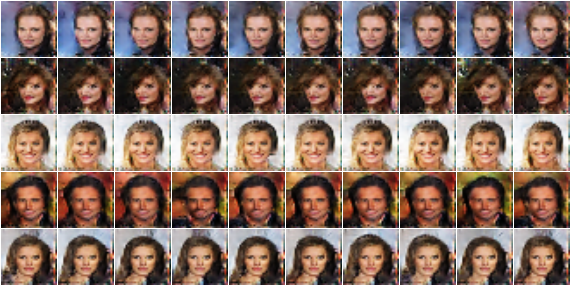

In [79]:
c_fix = convert(atype, disc_embed_mat[:,l_array[1]])

for i=2:10
    c_fix = vcat(c_fix,  convert(atype, disc_embed_mat[:,l1]))
end
Array{Float32}(c_fix)
InfoGAN_CelebA.generate_and_plot(wg, mg; z=z_fix, c=c_fix,
                              scale=gridscale, gridsize=(gridrows, ny))

In [40]:

    l1 = Array{Int64}(ones(50))
    l_array = map(i->i*l1, 1:10)
    # Fix some noise and code to check the GAN output
    z_fix = InfoGAN_CelebA.sample_unif(atype,zdim,ny*gridrows)
    # Discrete codes for example generations
    l0 = map(i->reshape(collect(1:gridrows), 1, gridrows), 1:ny)
    #l0 = map(i->reshape(collect(1:gridrows), 1, gridrows), 1:ny)
    #l1 = vec(vcat(l0...)) #[11...122...23...99...9910...10] vector with lenght ny*o[:gridsize]
    cl_rand = InfoGAN_CelebA.sample_categoric(atype,cdim,ny*gridrows)
    cl = convert(atype, disc_embed_mat[:,l1])


Knet.KnetArray{Float32,2}(Knet.KnetPtr(Ptr{Void} @0x00000081056ea800, 2000, 0, nothing), (10, 50))

Constant entry = 1


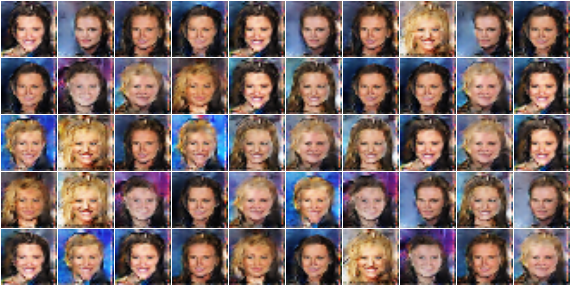

In [46]:
c_fix = cl # control one disc r.v. the others are varying
c_fix = vcat(cl, cl, cl, cl, cl, cl_rand, cl_rand, cl_rand, cl_rand, cl_rand)
println("Constant entry = 1")
flush(STDOUT)
InfoGAN_CelebA.generate_and_plot(wg, mg; z=z_fix, c=c_fix,
                              scale=gridscale, gridsize=(gridrows, ny))

Constant entry = 1


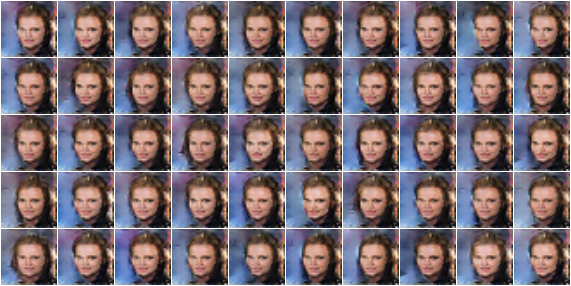

In [44]:
c_fix = cl # control one disc r.v. the others are varying
for i=1:9
    c_fix = vcat(c_fix, cl)
end
println("Constant entry = 1")
flush(STDOUT)
InfoGAN_CelebA.generate_and_plot(wg, mg; z=z_fix, c=c_fix,
                              scale=gridscale, gridsize=(gridrows, ny))

Constant entry = 2


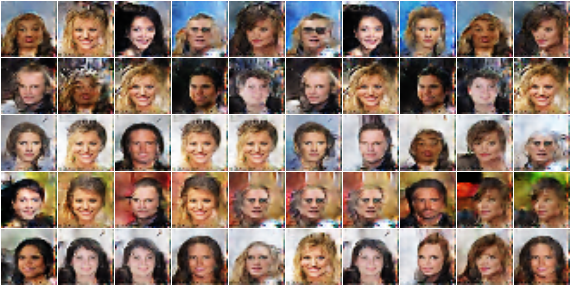

Constant entry = 3


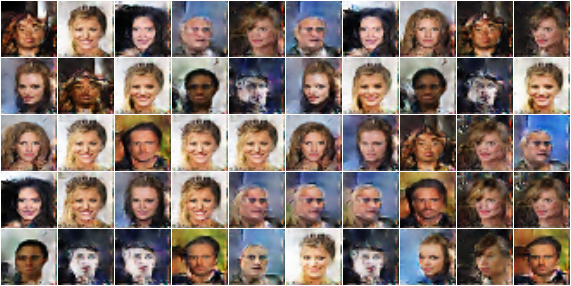

Constant entry = 4


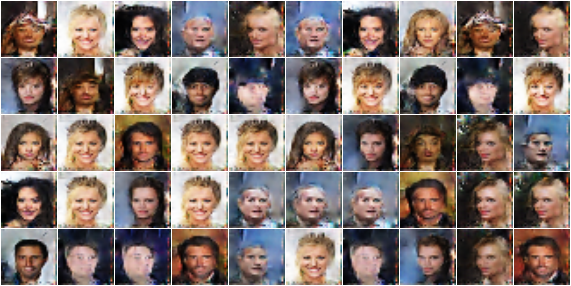

In [27]:
for j=1:3
    c_fix = cl_rand
    for i=1:9
        if i == j
            c_fix = vcat(c_fix, cl) # control one disc r.v. the others are varying
        else
            c_fix = vcat(c_fix, cl_rand)
        end
    end
println("Constant entry = $(j+1)")
flush(STDOUT)
InfoGAN_CelebA.generate_and_plot(wg, mg; z=z_fix, c=c_fix,
                              scale=gridscale, gridsize=(gridrows, ny))  
end

Constant entry = 5


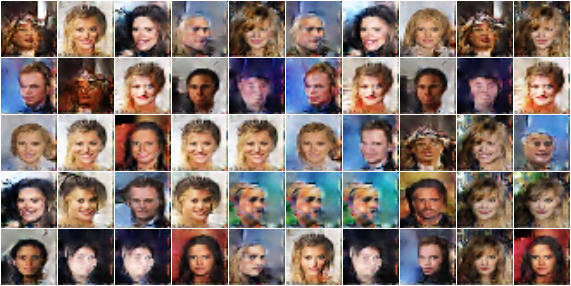

Constant entry = 6


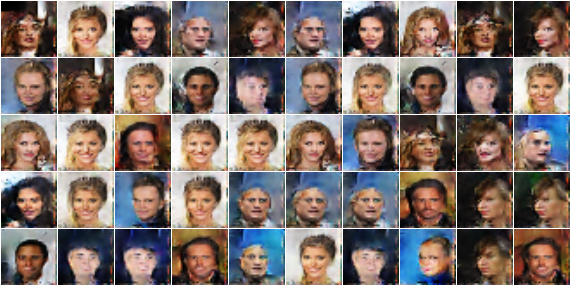

Constant entry = 7


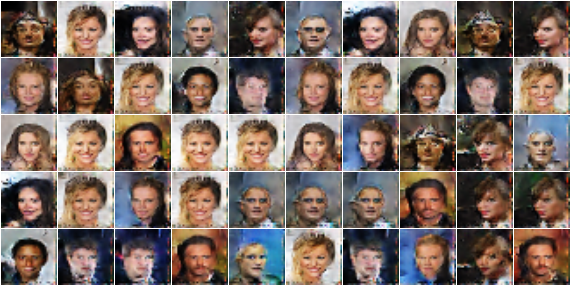

In [28]:
for j=4:6
    c_fix = cl_rand
    for i=1:9
        if i == j
            c_fix = vcat(c_fix, cl) # control one disc r.v. the others are varying
        else
            c_fix = vcat(c_fix, cl_rand)
        end
    end
println("Constant entry = $(j+1)")
flush(STDOUT)
InfoGAN_CelebA.generate_and_plot(wg, mg; z=z_fix, c=c_fix,
                              scale=gridscale, gridsize=(gridrows, ny))  
end

Constant entry = 9


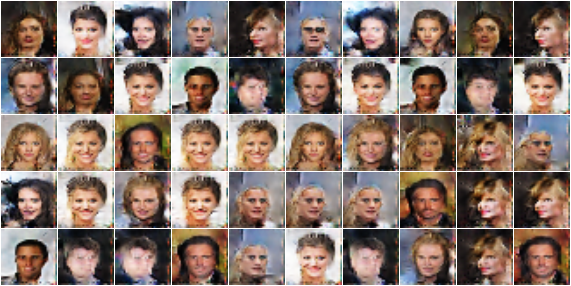

Constant entry = 10


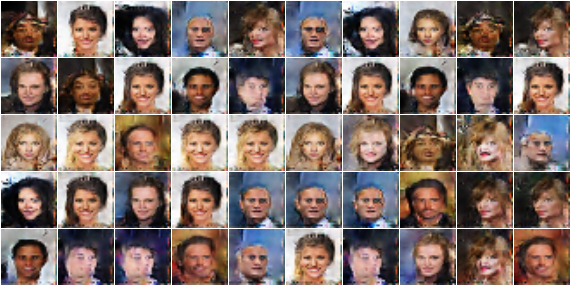

In [29]:
for j=8:9
    c_fix = cl_rand
    for i=1:9
        if i == j
            c_fix = vcat(c_fix, cl) # control one disc r.v. the others are varying
        else
            c_fix = vcat(c_fix, cl_rand)
        end
    end
println("Constant entry = $(j+1)")
flush(STDOUT)
InfoGAN_CelebA.generate_and_plot(wg, mg; z=z_fix, c=c_fix,
                              scale=gridscale, gridsize=(gridrows, ny))  
end